In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\baban\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\baban\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\baban\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\baban\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# load dataset 
iris = datasets.load_iris()

# x = sepal.length, y = petal_length

In [12]:
predictor_vals = np.array([predictors[0:2] for predictors in iris.data])
target_vals = np.array([1 if predictor==0 else 0 for predictor in iris.target])

In [13]:
target_vals

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# data spliting 
X_train, X_test, y_train,y_test = train_test_split(predictor_vals,target_vals,train_size =0.75,random_state = 0)

In [21]:
# place holder initialization 
x_data = tf.placeholder(shape=[None,2], dtype =tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype =tf.float32)

In [22]:
# create weight and bias matrics 
w = tf.Variable(tf.ones([2,1]))
b = tf.Variable(tf.ones([1,1]))

In [23]:
# model operation 
model_output = tf.add(tf.matmul(x_data,w),b)

In [25]:
# decalre optimizer and loss 
# working with L1 loss : abs(pred-actual)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output,labels = y_target))

# optimizer 
my_opt = tf.train.AdamOptimizer(0.01)

train_step = my_opt.minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
# initialize variables and sessions 

sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init)

In [30]:
prediction = tf.round(tf.sigmoid(model_output))
prediction_correct= tf.cast(tf.equal(prediction, y_target) ,tf.float32)
accuracy = tf.reduce_mean(prediction_correct)

In [35]:
# model fitting 
lossArray = []
trainAccuracy = []
testAccuracy = []
for i in range(1000):
    batchsize = 40
    batch_index = np.random.choice(len(X_train),size =batchsize)
    
    batchX = X_train[batch_index]
    batchy = np.transpose([y_train[batch_index]])
    
    sess.run(train_step, feed_dict={x_data:batchX,y_target:batchy})
    
    batchloss = sess.run(loss, feed_dict ={x_data:batchX,y_target:batchy})
    
    lossArray.append(batchloss)
    
    batchAccuracyTrain = sess.run(accuracy, feed_dict={x_data:X_train,y_target:np.transpose([y_train])})
    trainAccuracy.append(batchAccuracyTrain)
    
    batchAccuracyTest = sess.run(accuracy, feed_dict={x_data:X_test,y_target:np.transpose([y_test])})
    testAccuracy.append(batchAccuracyTest)
    
    
    if (i+1)%50 ==0:
        print('\nloss = ' + str(batchloss)+' and Accuracy = ' + str(batchAccuracyTrain) )   


loss = 0.8190155 and Accuracy = 0.33035713

loss = 0.68892884 and Accuracy = 0.66964287

loss = 0.509438 and Accuracy = 0.66964287

loss = 0.54730225 and Accuracy = 0.66964287

loss = 0.49117526 and Accuracy = 0.66964287

loss = 0.4496441 and Accuracy = 0.66964287

loss = 0.4770511 and Accuracy = 0.66964287

loss = 0.5885728 and Accuracy = 0.66964287

loss = 0.4509945 and Accuracy = 0.66964287

loss = 0.43776098 and Accuracy = 0.73214287

loss = 0.46327057 and Accuracy = 0.6875

loss = 0.39296243 and Accuracy = 0.75

loss = 0.41457948 and Accuracy = 0.8660714

loss = 0.4102355 and Accuracy = 0.8660714

loss = 0.36928192 and Accuracy = 0.91071427

loss = 0.38611025 and Accuracy = 0.89285713

loss = 0.37902734 and Accuracy = 0.91964287

loss = 0.35077047 and Accuracy = 0.91964287

loss = 0.30797654 and Accuracy = 0.98214287

loss = 0.32369083 and Accuracy = 0.97321427


<function matplotlib.pyplot.show(*args, **kw)>

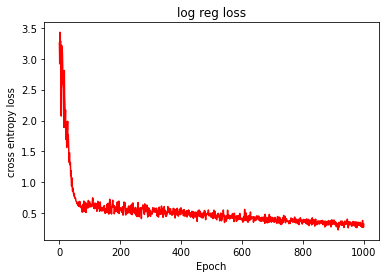

In [36]:
# model accuracy plots 
plt.plot(lossArray,'r-')
plt.title('log reg loss')
plt.xlabel('Epoch')
plt.ylabel('cross entropy loss')
plt.show